<a href="https://colab.research.google.com/github/Gui-Rigaud/hateful-speech-detection/blob/feat%2Feda%2Bfeature_extraction/Detec%C3%A7%C3%A3o_de_Fake_News_Projeto_CIN0144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Bibliotecas

In [4]:
%pip install transformers
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

## Análise Exploratória dos Dados

In [3]:
from sklearn.model_selection import train_test_split

train_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/train.csv'
df_train = pd.read_csv(train_file_path)
y_train = df_train['label']
X_train = df_train['content']

test_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/test.csv'
df_test = pd.read_csv(test_file_path)
y_test = df_test['label']
X_test = df_test['content']

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  5760 non-null   object 
 1   label    5760 non-null   int64  
 2   rating   5760 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.1+ KB


In [5]:
df_train.head()

,content,label,rating
0,﻿juiz determina soltura de 4 presos por pensão...,1,0.031619
1,"pivô do mensalão, jefferson não assistiu à tra...",1,0.033124
2,oficial da reserva avisa: se a lei do impeachm...,0,0.008723
3,bolsonaro vai para o psl e liberais abandonam ...,1,0.016806
4,"por maioria de votos, os ministros da 2.a tur...",1,0.021402


In [6]:
print("Tamanho do conjunto de TREINO:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

Tamanho do conjunto de TREINO:
Textos: 5760
Rótulos: 5760


In [7]:
# Identificando valores nulos

# Conjunto de treino
print("\nValores Nulos:")
print("\nTreino")
print(df_train.isnull().sum())


Valores Nulos:

Treino
content    0
label      0
rating     0
dtype: int64


In [8]:
# Contagem de textos duplicados no conjunto de treino
duplicates_train = df_train.duplicated(subset=['content']).sum()
print(f"Número de textos duplicados no conjunto de treino: {duplicates_train}")


Número de textos duplicados no conjunto de treino: 1


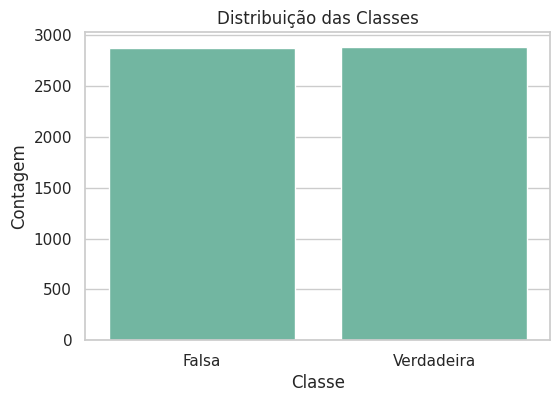

In [9]:
class_distribution = df_train['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

In [10]:
df_train['text_length'] = df_train['content'].apply(len)

print("Added 'text_length' column to df_train. Head of df_train:")
print(df_train.head())

Added 'text_length' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  
0         4535  
1         4062  
2         1338  
3         5669  
4         3219  


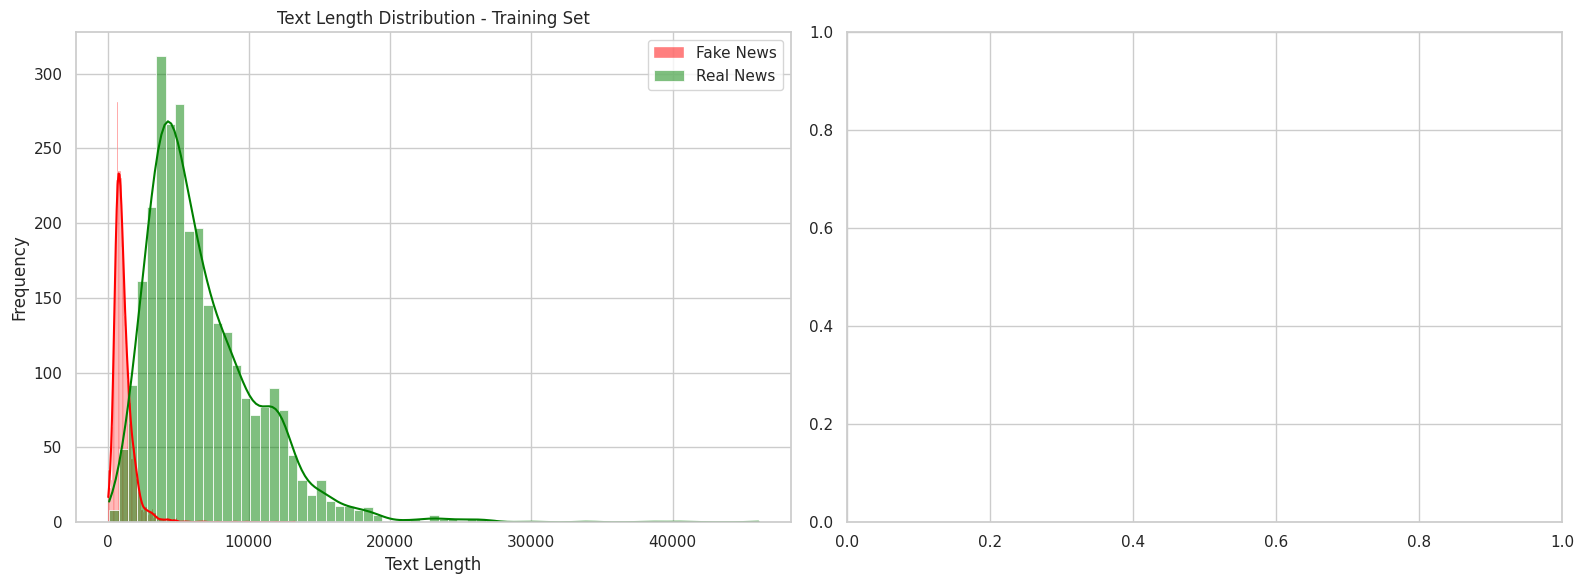

Text length distribution plots generated for training set.


In [11]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['text_length'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['text_length'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Text Length Distribution - Training Set')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
axes[0].legend()

plt.tight_layout()
plt.show()

print("Text length distribution plots generated for training set.")

In [12]:
df_train['word_count'] = df_train['content'].apply(lambda x: len(x.split()))

print("Added 'word_count' column to df_train. Head of df_train:")
print(df_train.head())

Added 'word_count' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  word_count  
0         4535         727  
1         4062         668  
2         1338         224  
3         5669         917  
4         3219         500  


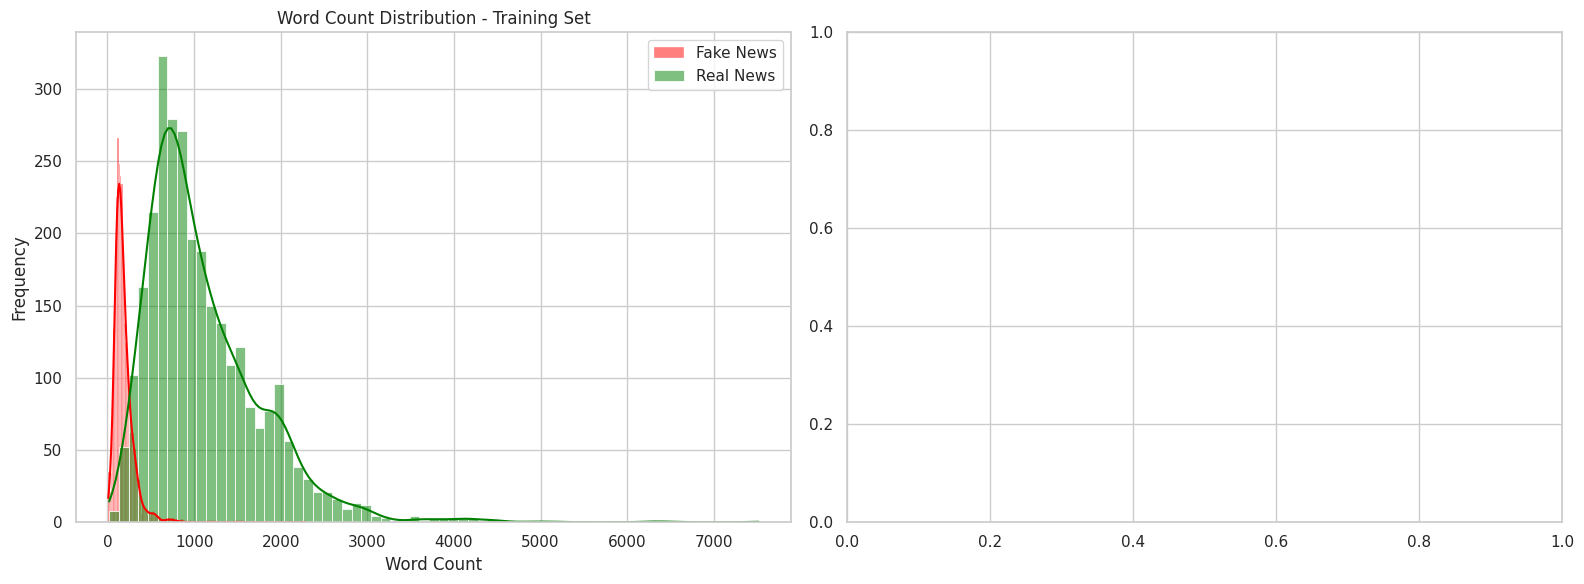

Word count distribution plots generated for training set.


In [13]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['word_count'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['word_count'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Word Count Distribution - Training Set')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

plt.tight_layout()
plt.show()

print("Word count distribution plots generated for training set.")

## Separação dos conjuntos em treino, teste e validação

In [14]:
X_train, X_val, y_train, y_val = train_test_split(df_train["content"], df_train["label"], test_size=0.2, random_state=42)

In [15]:
# Exibindo o tamanho dos novos conjuntos
print("Conjunto de Treino:")
print("X_train size:", X_train.shape)
print("Y_train size:", y_train.shape)

print("\nConjunto de Validação:")
print("X_val size:", X_val.shape)
print("Y_val size:", y_val.shape)

Conjunto de Treino:
X_train size: (4608,)
Y_train size: (4608,)

Conjunto de Validação:
X_val size: (1152,)
Y_val size: (1152,)


## Limpeza dos dados

In [16]:
# Remover valores repetidos do conjunto de treino
df_train.drop_duplicates(subset=['content'], inplace=True)

print(f"Novo tamanho do conjunto de treino após remover duplicatas: {len(df_train)}")


Novo tamanho do conjunto de treino após remover duplicatas: 5759


In [17]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('portuguese')
except LookupError:
    nltk.download('stopwords')
    print("NLTK 'stopwords' corpus downloaded.")
else:
    print("NLTK 'stopwords' corpus is already downloaded.")

NLTK 'stopwords' corpus is already downloaded.


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^À-ſ -~]', '', text) # Keep only accented characters, common punctuation, numbers and letters from the Latin-1 Supplement Unicode block
    text = re.sub(r'\W', ' ', text) # Remove punctuation and symbols, keep spaces
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing whitespace

    # Handle specific patterns if needed, for example, multiple dots or other common noise
    text = re.sub(r'\.{2,}', '.', text) # Replace multiple dots with a single dot

    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = text.split()
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

# Apply the cleaning function
X_train = X_train.apply(clean_text)
X_val = X_val.apply(clean_text)

# Create new DataFrames with cleaned content and labels
df_train_cleaned = pd.DataFrame({'cleaned_content': X_train, 'label': y_train})
df_val_cleaned = pd.DataFrame({'cleaned_content': X_val, 'label': y_val})

# Separate cleaned content by label for train, validation set
X_train_fake_cleaned = df_train_cleaned[df_train_cleaned['label'] == 0]['cleaned_content']
X_train_real_cleaned = df_train_cleaned[df_train_cleaned['label'] == 1]['cleaned_content']

X_val_fake_cleaned = df_val_cleaned[df_val_cleaned['label'] == 0]['cleaned_content']
X_val_real_cleaned = df_val_cleaned[df_val_cleaned['label'] == 1]['cleaned_content']

print("Text cleaning and separation by label completed for all datasets.")
print("Head of X_train:")
print(X_train.head())
print("\nHead of X_train_fake_cleaned:")
print(X_train_fake_cleaned.head())

Text cleaning and separation by label completed for all datasets.
Head of X_train:
387     veja leia íntegra pronunciamento temer sobre d...
4362    travessia infância adolescência internado inst...
4397    força tarefa operação lava jato cruzou documen...
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
Name: content, dtype: object

Head of X_train_fake_cleaned:
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
3166    ministro coreia nova york declarou guerra eua ...
2146    gráficas movimentaram r 52 milhões campanha di...
3103    lula admite condenado novos crimes pf mp inven...
Name: cleaned_content, dtype: object


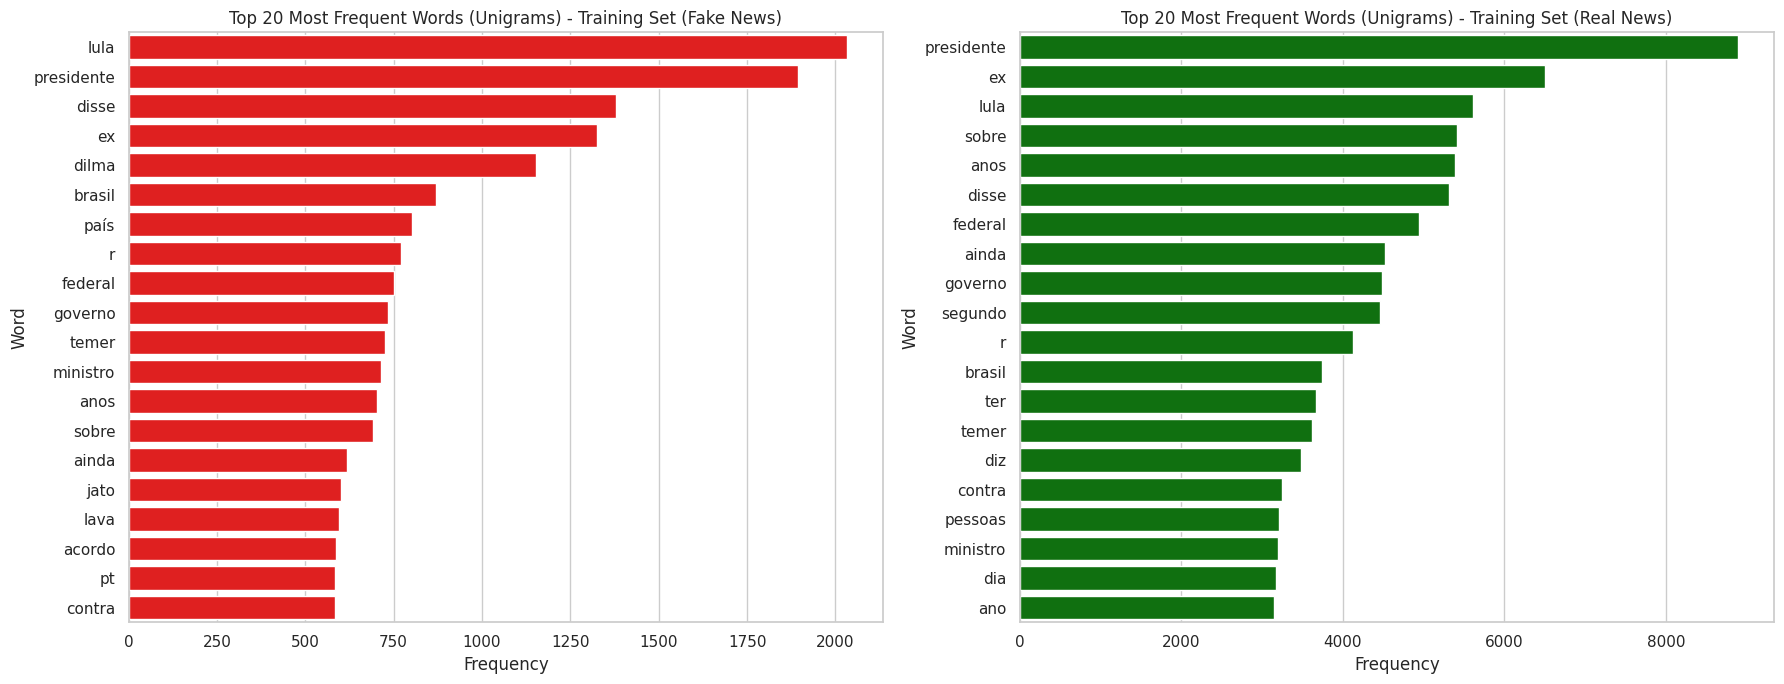

Top 20 most frequent unigrams for fake and real news in training set are displayed.


In [26]:
from collections import Counter

def get_top_n_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top 20 most common words for each category and dataset
top_fake_train_words = get_top_n_words(X_train_fake_cleaned)
top_real_train_words = get_top_n_words(X_train_real_cleaned)

# Prepare data for plotting
def prepare_plot_data(top_words):
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]
    return pd.DataFrame({'Word': words, 'Count': counts})

df_top_fake_train = prepare_plot_data(top_fake_train_words)
df_top_real_train = prepare_plot_data(top_real_train_words)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Training Set - Fake News
sns.barplot(x='Count', y='Word', data=df_top_fake_train, ax=axes[0], color='red')
axes[0].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Fake News)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# Training Set - Real News
sns.barplot(x='Count', y='Word', data=df_top_real_train, ax=axes[1], color='green')
axes[1].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Real News)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Word')

plt.tight_layout()
plt.show()

print("Top 20 most frequent unigrams for fake and real news in training set are displayed.")

In [27]:
from wordcloud import WordCloud
import matplotlib.colors

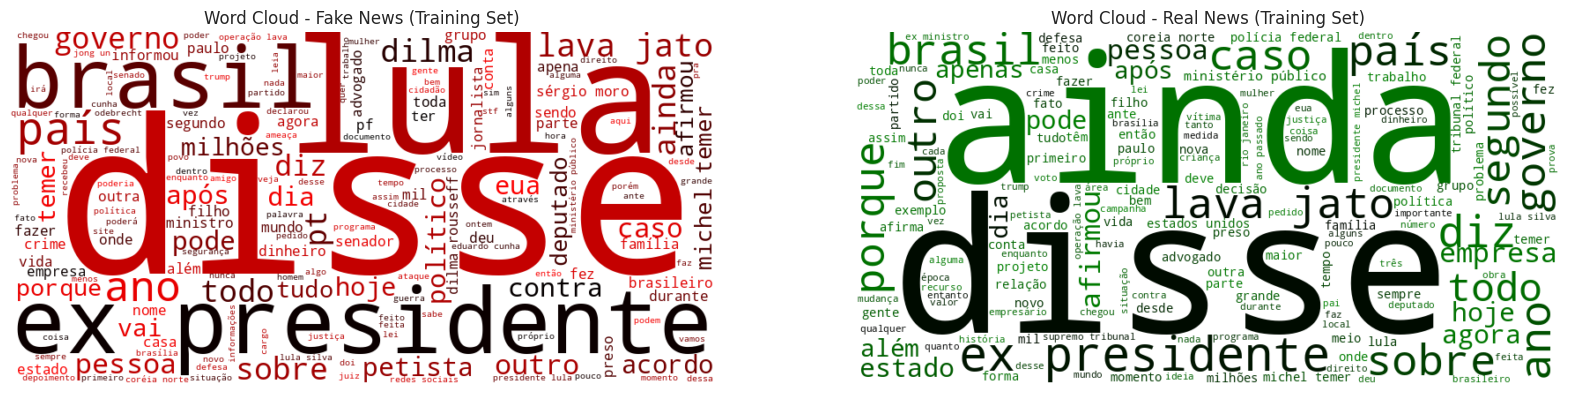

Word clouds for fake and real news in the training set have been generated and displayed.


In [28]:
cmap_fake = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_fake", ["#000000", "#8b0000", "#ff0000"]) # Black to dark red to red
cmap_real = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_real", ["#000000", "#006400", "#008000"]) # Black to dark green to green

# Create a single string of all cleaned fake news words for the training set
all_fake_train_words = ' '.join(X_train_fake_cleaned.astype(str))

# Create a single string of all cleaned real news words for the training set
all_real_train_words = ' '.join(X_train_real_cleaned.astype(str))

# Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap=cmap_fake, min_font_size=10).generate(all_fake_train_words)

# Generate word cloud for real news
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap=cmap_real, min_font_size=10).generate(all_real_train_words)

# Display both word clouds side-by-side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News (Training Set)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real News (Training Set)')
plt.axis('off')

plt.show()

print("Word clouds for fake and real news in the training set have been generated and displayed.")

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigrams(text_series, n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_counts_matrix = vectorizer.fit_transform(text_series)
    bigram_names = vectorizer.get_feature_names_out()
    sum_bigram_counts = bigram_counts_matrix.sum(axis=0)
    bigram_counts = [(bigram_names[i], sum_bigram_counts[0, i]) for i in range(len(bigram_names))]
    bigram_counts = sorted(bigram_counts, key=lambda x: x[1], reverse=True)
    return bigram_counts[:n]

# Get top 20 most common bigrams for each category and dataset
top_fake_train_bigrams = get_top_n_bigrams(X_train_fake_cleaned)
top_real_train_bigrams = get_top_n_bigrams(X_train_real_cleaned)

# Prepare data for plotting
def prepare_plot_data_bigrams(top_bigrams):
    bigrams = [bigram for bigram, count in top_bigrams]
    counts = [count for bigram, count in top_bigrams]
    return pd.DataFrame({'Bigram': bigrams, 'Count': counts})

df_top_fake_train_bigrams = prepare_plot_data_bigrams(top_fake_train_bigrams)
df_top_real_train_bigrams = prepare_plot_data_bigrams(top_real_train_bigrams)

print("Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.")


Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.


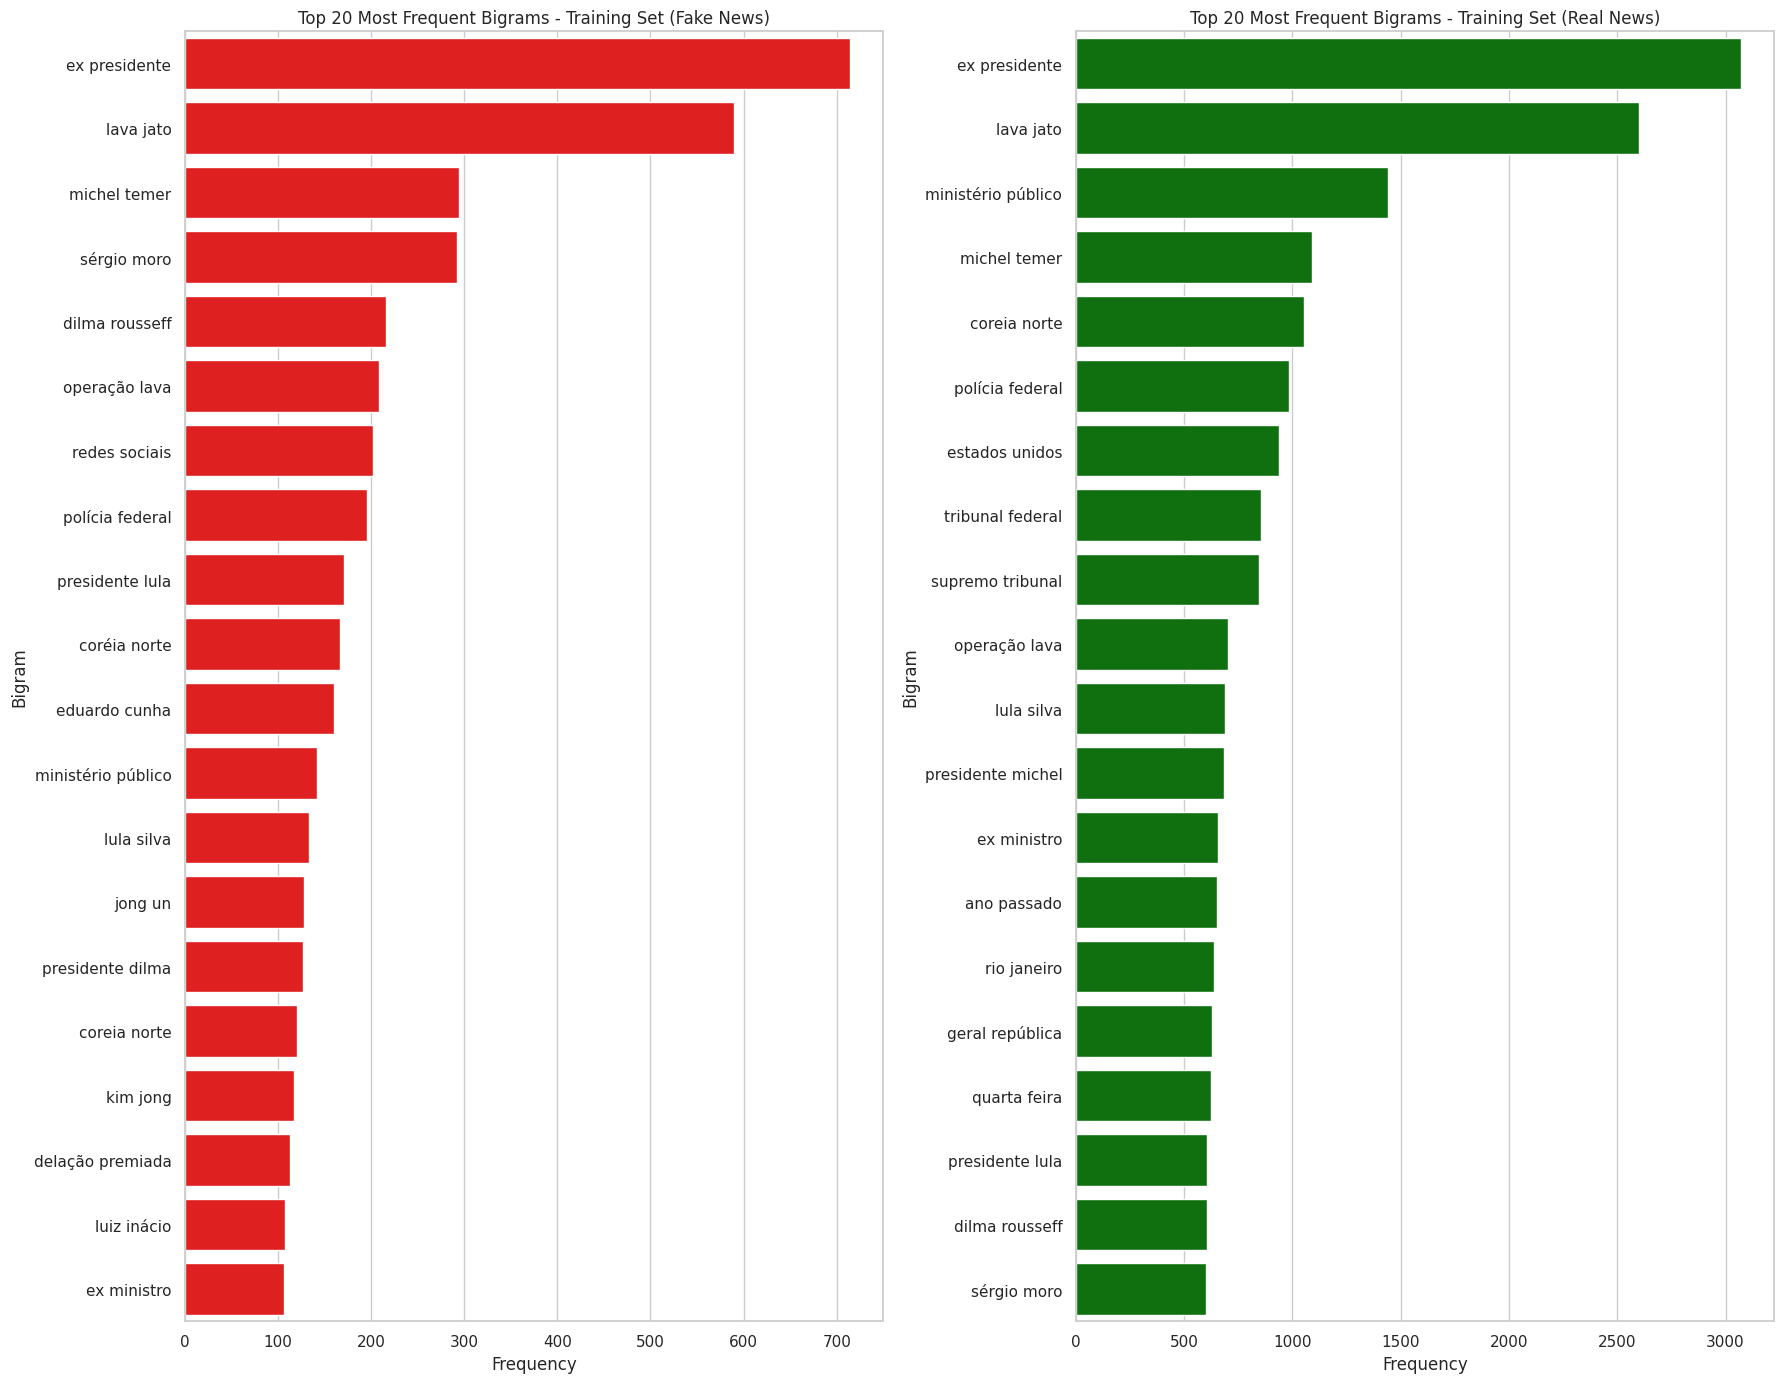

Top 20 most frequent bigrams for fake and real news in training set are displayed.


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 14))

# Training Set - Fake News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_fake_train_bigrams, ax=axes[0], color='red')
axes[0].set_title('Top 20 Most Frequent Bigrams - Training Set (Fake News)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigram')

# Training Set - Real News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_real_train_bigrams, ax=axes[1], color='green')
axes[1].set_title('Top 20 Most Frequent Bigrams - Training Set (Real News)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Bigram')

plt.tight_layout()
plt.show()

print("Top 20 most frequent bigrams for fake and real news in training set are displayed.")

## Extração de Características

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_val_vector = vectorizer.transform(X_val)

In [32]:
print(X_train_vector.shape)
print(X_test_vector.shape)
print(X_val_vector.shape)

(4608, 71956)
(1440, 71956)
(1152, 71956)


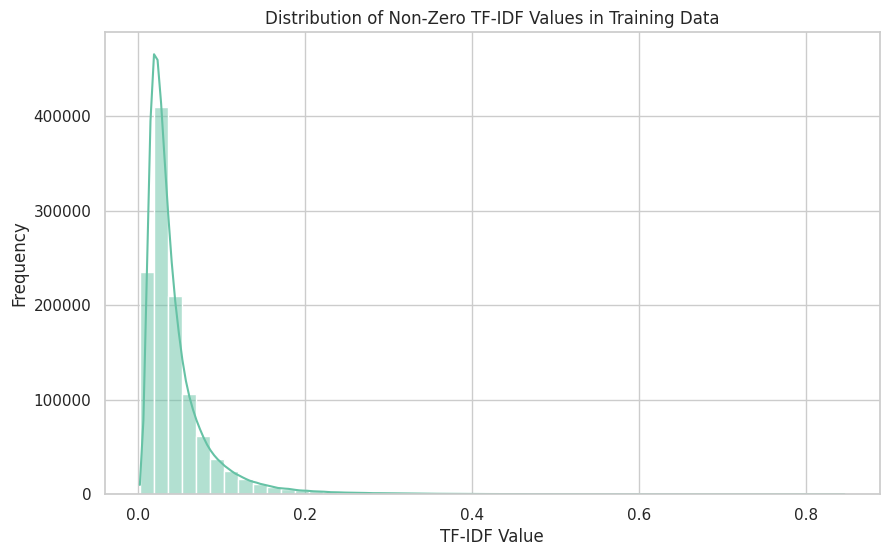

Minimum TF-IDF value: 0.0022
Maximum TF-IDF value: 0.8455
Mean TF-IDF value: 0.0455
Standard Deviation of TF-IDF values: 0.0442


In [33]:
# Get non-zero values from the sparse matrix
# TF-IDF vectors are typically sparse, so visualizing all zeros is not informative.
non_zero_values = X_train_vector.data

plt.figure(figsize=(10, 6))
sns.histplot(non_zero_values, bins=50, kde=True)
plt.title('Distribution of Non-Zero TF-IDF Values in Training Data')
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum TF-IDF value: {np.min(non_zero_values):.4f}")
print(f"Maximum TF-IDF value: {np.max(non_zero_values):.4f}")
print(f"Mean TF-IDF value: {np.mean(non_zero_values):.4f}")
print(f"Standard Deviation of TF-IDF values: {np.std(non_zero_values):.4f}")


## Tokenização

In [33]:
from transformers import BertTokenizer, BertModel
import torch
from google.colab import userdata
from tqdm.auto import tqdm

# Get HuggingFace token from Colab secrets
hf_token = userdata.get('HF_TOKEN')

# Initialize tokenizer and model with the token
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', token=hf_token)
model = BertModel.from_pretrained('bert-base-uncased', token=hf_token)

def get_bert_embeddings(text):
    # Gera as inputs como tensores PyTorch com truncamento e comprimento máximo de 512 tokens
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Passa os tensores para o modelo
    outputs = model(**inputs)
    # Calcula a média sobre a dimensão das sequências e converte para NumPy
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

print("Generating BERT embeddings. This might take a while...")
# Obtenha os embeddings para o conjunto de treino, teste e validação
X_train_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_train, desc="Generating train embeddings")]
X_test_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_test, desc="Generating test embeddings")]
X_val_bert_embeddings = [get_bert_embeddings(text) for text in tqdm(X_val, desc="Generating validation embeddings")]
print("BERT embeddings generation complete.")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating BERT embeddings. This might take a while...


Generating train embeddings:   0%|          | 0/4608 [00:00<?, ?it/s]

Generating test embeddings:   0%|          | 0/1440 [00:00<?, ?it/s]

Generating validation embeddings:   0%|          | 0/1152 [00:00<?, ?it/s]

BERT embeddings generation complete.


In [ ]:
import numpy as np
X_train_bert_embeddings_save = np.array(X_train_bert_embeddings)
X_test_bert_embeddings_save = np.array(X_test_bert_embeddings)
X_val_bert_embeddings_save = np.array(X_val_bert_embeddings)

# Salvando os embeddings
np.save('X_train_bert_embeddings.npy', X_train_bert_embeddings_save)
np.save('X_test_bert_embeddings.npy', X_test_bert_embeddings_save)
np.save('X_val_bert_embeddings.npy', X_val_bert_embeddings_save)
print("Embeddings salvos!")

NameError: name 'X_train_bert_embeddings' is not defined

In [34]:
# Carregando os embeddings salvos
X_train_bert_embeddings = np.load('./content/X_train_bert_embeddings.npy')
X_test_bert_embeddings = np.load('./content/X_test_bert_embeddings.npy')
X_val_bert_embeddings = np.load('./content/X_val_bert_embeddings.npy')


print("Tamanho dos embeddings de treino:", X_train_bert_embeddings.shape)
print("Tamanho dos embeddings de teste:", X_test_bert_embeddings.shape)
print("Tamanho dos embeddings de validação:", X_val_bert_embeddings.shape)

Tamanho dos embeddings de treino: (4608, 1, 768)
Tamanho dos embeddings de teste: (1440, 1, 768)
Tamanho dos embeddings de validação: (1152, 1, 768)


## Modelagem de Dados
Nesta seção treinamos modelos de referência (baselines) usando TF-IDF e comparamos com classificadores treinados sobre embeddings BERT, caso estes estejam disponíveis no ambiente do Colab.

In [35]:
# Preparação: imports e verificação dos conjuntos limpos
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
sns.set_theme(style="whitegrid")

Treinando LogisticRegression...
Treinando LinearSVC...

===== Resultados de VALIDAÇÃO para LogReg_TFIDF =====

              precision    recall  f1-score   support

           0     0.9288    0.9663    0.9472       594
           1     0.9625    0.9211    0.9414       558

    accuracy                         0.9444      1152
   macro avg     0.9457    0.9437    0.9443      1152
weighted avg     0.9451    0.9444    0.9444      1152



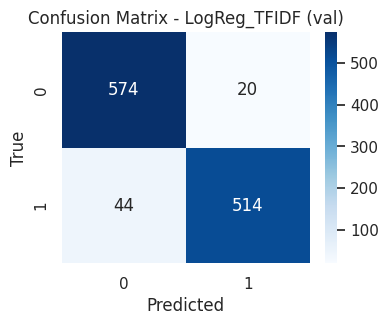


===== Resultados de VALIDAÇÃO para LinearSVC_TFIDF =====

              precision    recall  f1-score   support

           0     0.9522    0.9731    0.9625       594
           1     0.9706    0.9480    0.9592       558

    accuracy                         0.9609      1152
   macro avg     0.9614    0.9605    0.9609      1152
weighted avg     0.9611    0.9609    0.9609      1152



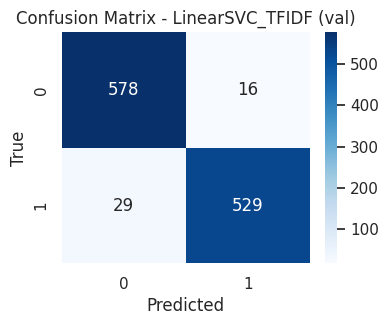

['models/tfidf_vectorizer.joblib']

In [36]:
# Pipeline 1: TF-IDF (unigram+bigram) + Baselines (avaliar APENAS em validação)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib, os

X_train_vec = X_train_vector
X_val_vec = X_val_vector
X_test_vec = X_test_vector  # mantemos X_test_vec disponível mas NÃO avaliamos aqui

# Definir e treinar modelos
logreg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
svc = LinearSVC(max_iter=2000)

print('Treinando LogisticRegression...')
logreg.fit(X_train_vec, y_train)

print('Treinando LinearSVC...')
svc.fit(X_train_vec, y_train)

# Avaliar e mostrar relatórios APENAS em VALIDAÇÃO. Teste será usado somente no passo final.
models = {'LogReg_TFIDF': logreg, 'LinearSVC_TFIDF': svc}
for name, model in models.items():
    print(f"\n===== Resultados de VALIDAÇÃO para {name} =====\n")
    y_val_pred = model.predict(X_val_vec)

    print(classification_report(y_val, y_val_pred, digits=4))

    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (val)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # salvar modelo localmente em models/
    os.makedirs('models', exist_ok=True)
    joblib.dump(model, f'models/{name}.joblib')

# salvar o vetorizer em models/
joblib.dump(vectorizer, 'models/tfidf_vectorizer.joblib')


**Observações finais**:
- As células acima criam dois pipelines reproduzíveis: (1) TF-IDF + baselines;

## Finalização da Modelagem: mais modelos, tunagem e comparação de reamostragem
As células a seguir adicionam: MultinomialNB e RandomForest, GridSearchCV para tunagem e salvamento de métricas e artefatos em `models/` e `reports/`.

In [37]:
# Instala/atualiza apenas o que é necessário para evitar conflitos com outros pacotes
# Evitamos forçar uma versão do scikit-learn (isso pode quebrar outras dependências no Colab).
# Estratégia: tentar importar; se falhar, instalar/atualizar imbalanced-learn e shap.

try:
    import imblearn
    import shap
    print('imblearn and shap already available. imblearn==', getattr(imblearn, '__version__', 'unknown'), 'shap==', getattr(shap, '__version__', 'unknown'))
except Exception as e:
    print('imblearn/shap not available or import failed (', e, '). Installing/upgrading packages now...')
    import sys
    # Atualiza apenas imbalanced-learn e shap; NÃO forçamos scikit-learn para evitar conflitos
    # Use quiet para reduzir saída; se quiser ver detalhes, remova --quiet
    !{sys.executable} -m pip install -U imbalanced-learn shap --quiet
    # Após instalar, sugerimos reiniciar o runtime (Colab) para garantir carregamento limpo das libs
    print('Instalação concluída. IMPORTANTE: reinicie o runtime (Runtime -> Restart runtime) antes de continuar.')

# Imports adicionais para a finalização da modelagem (serão executados depois do restart, se necessário)
import os
import time
import json
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# Note: imblearn imports may be safe after restart; we import them later where used to avoid early ImportError
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import joblib
import warnings
warnings.filterwarnings('ignore')
# Criar pastas para artefatos
os.makedirs('models', exist_ok=True)
os.makedirs('reports', exist_ok=True)
print('Pastas `models/` e `reports/` prontas.\nSe instalou pacotes acima, reinicie o runtime antes de executar as próximas células.')

imblearn and shap already available. imblearn== 0.14.0 shap== 0.49.1
Pastas `models/` e `reports/` prontas.
Se instalou pacotes acima, reinicie o runtime antes de executar as próximas células.


In [38]:
# Definir novos modelos e grades de hiperparâmetros
models_to_run = {
    'MultinomialNB': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0]}),
    'RandomForest': (RandomForestClassifier(random_state=42, n_jobs=-1), {'n_estimators': [100, 200], 'max_depth': [None, 10, 30]})
}
# Reutilizar os modelos já treinados (LogReg, LinearSVC) se presentes na sessão
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
models_to_tune = {
    'LogisticRegression': (LogisticRegression(max_iter=2000, random_state=42), {'C': [0.01, 0.1, 1, 10]}),
    'LinearSVC': (LinearSVC(max_iter=2000), {'C': [0.01, 0.1, 1, 10]})
}
# Juntar dicionários
models_to_tune.update(models_to_run)
models_to_tune.keys()

dict_keys(['LogisticRegression', 'LinearSVC', 'MultinomialNB', 'RandomForest'])

In [56]:
# Função utilitária para medir tempo de inferência por amostra
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score

def measure_inference_time(model, X, n_runs=20):
    # repetir previsões e medir tempo médio por amostra em ms
    import time
    start = time.time()
    for _ in range(n_runs):
        _ = model.predict(X)
    end = time.time()
    total = (end - start) / n_runs
    return (total / X.shape[0]) * 1000  # ms por amostra

# Função para executar GridSearchCV e avaliar em validação (não usa o conjunto de teste)
def run_search_and_eval(name, estimator, param_grid, X_train_vec, y_train, X_val_vec, y_val):
    print(f'Executando: {name}')
    X_train_used = X_train_vec
    y_train_used = y_train

    # GridSearchCV (usa validação interna para selecionar parâmetros)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    gs = GridSearchCV(estimator, param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=0)
    gs.fit(X_train_used, y_train_used)
    best = gs.best_estimator_
    print('Melhor params:', gs.best_params_)
    X_val_for_pred = X_val_vec

    y_val_pred = best.predict(X_val_for_pred)

    # Probabilidades para AUC quando disponíveis (na validação)
    try:
        # Tenta predict_proba para modelos que suportam probabilidades
        y_val_prob = best.predict_proba(X_val_for_pred)[:,1]
        auc_val = roc_auc_score(y_val, y_val_prob)
    except AttributeError:
        # Para modelos como LinearSVC que não têm predict_proba, usa decision_function
        try:
            y_val_prob = best.decision_function(X_val_for_pred)
            auc_val = roc_auc_score(y_val, y_val_prob)
        except Exception:
            auc_val = None
    except Exception:
        auc_val = None

    # medir tempo de inferência sobre validação para referência (ms por amostra)
    inf_time_ms = measure_inference_time(best, X_val_for_pred)

    # Relatórios (validação)
    from sklearn.metrics import classification_report
    report_val = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)

    # salvar artefatos
    artifact_prefix = f"models/{name}"
    os.makedirs('models', exist_ok=True)
    joblib.dump(best, artifact_prefix + '.joblib')
    results = {
        'model': name,
        'best_params': gs.best_params_,
        'val_f1': report_val.get('weighted avg', {}).get('f1-score') if 'weighted avg' in report_val else None,
        'val_precision': report_val.get('weighted avg', {}).get('precision') if 'weighted avg' in report_val else None,
        'val_recall': report_val.get('weighted avg', {}).get('recall') if 'weighted avg' in report_val else None,
        'val_auc': auc_val,
        'inference_time_ms_per_sample_val': inf_time_ms,
    }

    # salvar relatório detalhado de validação
    os.makedirs('reports', exist_ok=True)
    with open(f"reports/{name}_val_report.json", 'w', encoding='utf-8') as f:
        json.dump({'classification_report_val': report_val, 'results_summary': results}, f, ensure_ascii=False, indent=2)
    return results


In [57]:
# Executar experimentos para cada modelo (sem técnicas de reamostragem)
results_list = []

# Loop de experimentos (treinar apenas com os dados originais)
for name, (estimator, param_grid) in models_to_tune.items():
    try:
        res = run_search_and_eval(name, estimator, param_grid, X_train_vec, y_train, X_val_vec, y_val)
        results_list.append(res)
    except Exception as e:
        print('Erro em experiment:', name, e)


df_results = pd.DataFrame(results_list)
if not df_results.empty:
    df_results.to_csv('reports/metrics_summary.csv', index=False)
    print('Experimentos concluídos. Resumo (métricas de validação) salvo em reports/metrics_summary.csv')
else:
    print('Nenhum resultado foi gerado (results_list está vazio). Verifique mensagens acima.')

df_results


Executando: LogisticRegression
Melhor params: {'C': 10}
Executando: LinearSVC
Melhor params: {'C': 10}
Executando: LinearSVC
Melhor params: {'C': 1}
Executando: MultinomialNB
Melhor params: {'alpha': 0.1}
Executando: RandomForest
Melhor params: {'C': 1}
Executando: MultinomialNB
Melhor params: {'alpha': 0.1}
Executando: RandomForest
Melhor params: {'max_depth': 30, 'n_estimators': 200}
Melhor params: {'max_depth': 30, 'n_estimators': 200}
Experimentos concluídos. Resumo (métricas de validação) salvo em reports/metrics_summary.csv
Experimentos concluídos. Resumo (métricas de validação) salvo em reports/metrics_summary.csv


,model,best_params,val_f1,val_precision,val_recall,val_auc,inference_time_ms_per_sample_val
0,LogisticRegression,{'C': 10},0.957445,0.957669,0.957465,0.988264,0.000253
1,LinearSVC,{'C': 1},0.960919,0.961145,0.960938,0.989449,0.000191
2,MultinomialNB,{'alpha': 0.1},0.818563,0.857661,0.822049,0.964743,0.000661
3,RandomForest,"{'max_depth': 30, 'n_estimators': 200}",0.951316,0.952542,0.951389,0.987446,0.083226


In [58]:
%pip install statsmodels --quiet
from pathlib import Path
from statsmodels.stats.contingency_tables import mcnemar
print('Libraries ready')

Note: you may need to restart the kernel to use updated packages.
Libraries ready


In [59]:
# Carregar resultados agregados (gerados pela etapa anterior)
metrics_path = Path('reports/metrics_summary.csv')
if not metrics_path.exists():
    print('Arquivo reports/metrics_summary.csv não encontrado. Execute a célula de experimentos antes.')
else:
    df_results = pd.read_csv(metrics_path)
    display(df_results.sort_values(by='val_f1', ascending=False).head(10))

    # Selecionar os dois melhores modelos (maior val_f1)
    top2 = df_results.sort_values(by='val_f1', ascending=False).head(2)
    print('Top 2 modelos selecionados para McNemar/testes:')
    display(top2)
    
    # Carregar modelos salvos correspondentes (assume path models/{model}.joblib)
    model_files = []
    for idx, row in top2.iterrows():
        model_name = row['model']
        candidate = Path(f'models/{model_name}.joblib')
        if candidate.exists():
            model_files.append(candidate)
        else:
            # fallback: find any matching file
            matches = list(Path('models').glob(f'{model_name}*.joblib'))
            if matches:
                model_files.append(matches[0])
            else:
                model_files.append(None)
    print('Model files:', model_files)

,model,best_params,val_f1,val_precision,val_recall,val_auc,inference_time_ms_per_sample_val
1,LinearSVC,{'C': 1},0.960919,0.961145,0.960938,0.989449,0.000191
0,LogisticRegression,{'C': 10},0.957445,0.957669,0.957465,0.988264,0.000253
3,RandomForest,"{'max_depth': 30, 'n_estimators': 200}",0.951316,0.952542,0.951389,0.987446,0.083226
2,MultinomialNB,{'alpha': 0.1},0.818563,0.857661,0.822049,0.964743,0.000661


Top 2 modelos selecionados para McNemar/testes:


,model,best_params,val_f1,val_precision,val_recall,val_auc,inference_time_ms_per_sample_val
1,LinearSVC,{'C': 1},0.960919,0.961145,0.960938,0.989449,0.000191
0,LogisticRegression,{'C': 10},0.957445,0.957669,0.957465,0.988264,0.000253


Model files: [PosixPath('models/LinearSVC.joblib'), PosixPath('models/LogisticRegression.joblib')]


In [63]:
# Executar teste de McNemar entre os dois melhores modelos (reconstrói model_files se necessário)
from pathlib import Path
from statsmodels.stats.contingency_tables import mcnemar

# Reconstruir model_files se não existir
try:
    model_files
except NameError:
    model_files = []
    metrics_path = Path('reports/metrics_summary.csv')
    if not metrics_path.exists():
        print('Arquivo reports/metrics_summary.csv não encontrado. Execute a célula de experimentos antes.')
    else:
        df_results = pd.read_csv(metrics_path)
        # Selecionar os dois melhores modelos
        top2 = df_results.sort_values(by='val_f1', ascending=False).head(2)

        for idx, row in top2.iterrows():
            model_name = str(row['model'])
            # tentativa padrão: models/{model}.joblib
            candidate = Path(f'models/{model_name}.joblib')
            if candidate.exists():
                model_files.append(candidate)
            else:
                # fallback: procurar qualquer arquivo que contenha o model_name
                matches = list(Path('models').glob(f'*{model_name}*.joblib'))
                model_files.append(matches[0] if matches else None)

print('Model files:', model_files)

# Verificar disponibilidade
if len(model_files) < 2 or model_files[0] is None or model_files[1] is None:
    print('Dois modelos não estão disponíveis para comparação; verifique models/ e reports/metrics_summary.csv')
else:
    m1 = joblib.load(model_files[0])
    m2 = joblib.load(model_files[1])

    if X_test_vec is None:
        print('X_test_vec indisponível — McNemar não pode ser executado com inputs presentes.')
    else:
        # Gerar previsões
        try:
            y_pred1 = m1.predict(X_test_vec)
            y_pred2 = m2.predict(X_test_vec)
        except Exception as e:
            print('Falha ao prever com os modelos sobre X_test_vec:', e)
            print('Verifique se os modelos esperam embeddings em vez de vetores TF-IDF.')
            raise

        # construir tabela de contingência:
        # [ [both_correct, m1_correct_m2_wrong], [m1_wrong_m2_correct, both_wrong] ]
        y_true = np.array(y_test)
        both_correct = np.sum((y_pred1 == y_true) & (y_pred2 == y_true))
        m1_only = np.sum((y_pred1 == y_true) & (y_pred2 != y_true))
        m2_only = np.sum((y_pred1 != y_true) & (y_pred2 == y_true))
        both_wrong = np.sum((y_pred1 != y_true) & (y_pred2 != y_true))
        table = [[both_correct, m1_only],[m2_only, both_wrong]]
        print('Contingency table:', table)
        result = mcnemar(table, exact=False, correction=True)
        print('McNemar statistic=%.4f, p-value=%.4f' % (result.statistic, result.pvalue))
        with open('reports/mcnemar_result.json', 'w', encoding='utf-8') as f:
            json.dump({'statistic': float(result.statistic), 'pvalue': float(result.pvalue)}, f, indent=2)
        
        # Calcular métricas de desempenho no conjunto de teste para ambos os modelos
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        
        # Obter nomes dos modelos
        model_name_1 = model_files[0].stem
        model_name_2 = model_files[1].stem
        
        # Calcular métricas para modelo 1
        m1_results = {
            'model': model_name_1,
            'accuracy': accuracy_score(y_true, y_pred1),
            'precision': precision_score(y_true, y_pred1, average='weighted', zero_division=0),
            'recall': recall_score(y_true, y_pred1, average='weighted', zero_division=0),
            'f1_score': f1_score(y_true, y_pred1, average='weighted', zero_division=0)
        }
        
        # Calcular AUC para modelo 1
        try:
            m1_prob = m1.predict_proba(X_test_vec)[:,1]
            m1_results['auc_roc'] = roc_auc_score(y_true, m1_prob)
        except AttributeError:
            try:
                m1_prob = m1.decision_function(X_test_vec)
                m1_results['auc_roc'] = roc_auc_score(y_true, m1_prob)
            except Exception:
                m1_results['auc_roc'] = None
        except Exception:
            m1_results['auc_roc'] = None
        
        # Calcular métricas para modelo 2
        m2_results = {
            'model': model_name_2,
            'accuracy': accuracy_score(y_true, y_pred2),
            'precision': precision_score(y_true, y_pred2, average='weighted', zero_division=0),
            'recall': recall_score(y_true, y_pred2, average='weighted', zero_division=0),
            'f1_score': f1_score(y_true, y_pred2, average='weighted', zero_division=0)
        }
        
        # Calcular AUC para modelo 2
        try:
            m2_prob = m2.predict_proba(X_test_vec)[:,1]
            m2_results['auc_roc'] = roc_auc_score(y_true, m2_prob)
        except AttributeError:
            try:
                m2_prob = m2.decision_function(X_test_vec)
                m2_results['auc_roc'] = roc_auc_score(y_true, m2_prob)
            except Exception:
                m2_results['auc_roc'] = None
        except Exception:
            m2_results['auc_roc'] = None
        
        # Criar DataFrame e salvar em CSV
        df_test_results = pd.DataFrame([m1_results, m2_results])
        df_test_results.to_csv('reports/test_results_top2_models.csv', index=False)
        print('\nResultados dos dois melhores modelos no conjunto de teste salvos em reports/test_results_top2_models.csv')
        display(df_test_results)


Model files: [PosixPath('models/LinearSVC.joblib'), PosixPath('models/LogisticRegression.joblib')]
Contingency table: [[np.int64(1377), np.int64(6)], [np.int64(3), np.int64(54)]]
McNemar statistic=0.4444, p-value=0.5050

Resultados dos dois melhores modelos no conjunto de teste salvos em reports/test_results_top2_models.csv


,model,accuracy,precision,recall,f1_score,auc_roc
0,LinearSVC,0.960417,0.960487,0.960417,0.960414,0.992967
1,LogisticRegression,0.958333,0.958458,0.958333,0.958329,0.992211


In [61]:
# Explicabilidade: extrair top features por coeficientes para modelos lineares e feature_importances para RandomForest
feature_names = vectorizer.get_feature_names_out()
# Função para salvar top features de um modelo linear
def save_top_linear_features(model, name, top_k=40):
    try:
        coefs = model.coef_
        if coefs.ndim == 1:
            coefs = coefs.reshape(1, -1)
        rows = []
        for class_idx in range(coefs.shape[0]):
            coef = coefs[class_idx]
            top_pos_idx = np.argsort(coef)[-top_k:][::-1]
            top_neg_idx = np.argsort(coef)[:top_k]
            rows.append({'model': name, 'class': class_idx, 'top_positive': [feature_names[i] for i in top_pos_idx], 'top_negative': [feature_names[i] for i in top_neg_idx]})
        with open(f'reports/{name}_top_features.json', 'w', encoding='utf-8') as f:
            json.dump(rows, f, ensure_ascii=False, indent=2)
    except Exception as e:
        print('Não foi possível extrair coeficientes para', name, e)

# Tentar extrair para modelos lineares salvos
for model_file in Path('models').glob('*.joblib'):
    try:
        m = joblib.load(model_file)
        m_name = model_file.stem
        if hasattr(m, 'coef_'):
            save_top_linear_features(m, m_name)
        elif hasattr(m, 'feature_importances_'):
            # RandomForest: mapar importâncias para features (usar SVD se necessário)
            try:
                importances = m.feature_importances_
                top_idx = np.argsort(importances)[-40:][::-1]
                top_feats = [feature_names[i] for i in top_idx]
                with open(f'reports/{m_name}_top_features.json', 'w', encoding='utf-8') as f:
                    json.dump({'model': m_name, 'top_features': top_feats}, f, ensure_ascii=False, indent=2)
            except Exception as e:
                print('Erro ao extrair importancias de feature:', m_name, e)
    except Exception as e:
        print('Falha ao carregar modelo', model_file, e)
print('Top features salvas em reports/*_top_features.json')

Top features salvas em reports/*_top_features.json


**Resumo da seção de modelagem**:
- Foram adicionados modelos adicionais, GridSearchCV e experimentos com reamostragem.
- Foram incluídas células para explicabilidade (top features) e teste estatístico McNemar entre os dois melhores modelos.


## Conclusão Final

A análise foi realizada para detectar notícias falsas em português, utilizando uma combinação de pré-processamento de texto, extração de características (embeddings TF-IDF e BERT) e técnicas de modelagem.

### Análise Exploratória dos Dados (EDA)

Nessa etapa os passos essenciais foram:

**Carregamento e Inspeção Inicial**: Começamos carregando os dados de treino e teste e utilizando comandos como `.info()` e `.head()` para uma visão rápida. Isso nos permitiu confirmar que as colunas 'content' (os textos das notícias) e `'label'` (indicando se eram falsas ou verdadeiras) estavam presentes e sem valores nulos, o que é um bom ponto de partida.

**Verificação de Duplicatas e Valores Nulos**: Uma análise mais detalhada confirmou a ausência de valores nulos em todas as colunas importantes. No entanto, identificamos a presença de um texto duplicado no conjunto de treino, uma informação crucial para a etapa de limpeza.

**Análise da Distribuição de Classes**: Avaliamos o balanceamento entre as notícias falsas e verdadeiras. Gráficos de barras (sns.barplot) mostraram que a proporção era relativamente equilibrada em ambos os conjuntos, o que é favorável para o treinamento do modelo.

**Estudo do Comprimento e Contagem de Palavras**: Adicionamos colunas para o comprimento do texto e a contagem de palavras, e visualizamos suas distribuições. Observamos algumas diferenças nesses atributos entre as notícias falsas e verdadeiras, sugerindo que o tamanho do conteúdo pode ser um fator discriminatório relevante a ser explorado pelos modelos.

### Limpeza do dados

A limpeza dos dados foi realizada em duas etapas principais:

**Remoção de Duplicatas**: Foi identificado e removido 1 texto duplicado no conjunto de treinamento (`df_train`), resultando em um novo tamanho de 5759 entradas.

**Limpeza e Pré-processamento de Texto**: Uma função clean_text foi aplicada aos conjuntos `X_train`, `X_val` e `X_test`. Esta função executou as seguintes operações:
- Conversão de todo o texto para letras minúsculas.
- Remoção de caracteres que não são letras, números ou acentos, mantendo alguns caracteres de pontuação e espaços.
- Substituição de múltiplas ocorrências de espaços por um único espaço.
- Remoção de espaços em branco no início e no final do texto.
- Substituição de múltiplos pontos por um único ponto.
- Remoção de stopwords da língua portuguesa (palavras comuns que geralmente não agregam significado, como 'de', 'a', 'o', etc.).

### Extração de Características

Para a extração de características, foram empregados dois métodos principais:
1.  **TF-IDF (Term Frequency-Inverse Document Frequency)**: Utilizado para converter o texto limpo em vetores numéricos, capturando a importância das palavras no corpus. Uma combinação de unigramas e bigramas foi usada.
2.  **Embeddings BERT**: Gerados a partir do modelo `neuralmind/bert-base-portuguese-cased`, que é pré-treinado para a língua portuguesa. A geração dos embeddings foi realizada em batches para eficiência e para capturar representações contextuais ricas do texto.

### Abordagem de Modelagem

A etapa de modelagem explorou uma variedade de classificadores, incluindo:
-   **Regressão Logística**
-   **LinearSVC**
-   **Multinomial Naive Bayes**
-   **Random Forest**

Para otimizar o desempenho dos modelos, foi utilizado `GridSearchCV` em conjunto com validação cruzada estratificada (`StratifiedKFold`) para a tunagem de hiperparâmetros.

### Comparação e Seleção de Modelos

A comparação entre os modelos foi feita utilizando métricas de desempenho na validação e, para os dois modelos de melhor performance, o **teste de McNemar** foi empregado para determinar se havia uma diferença estatisticamente significativa em suas taxas de erro no conjunto de teste.

### Avaliação Final no Conjunto de Teste (Melhor Modelo):

O melhor modelo identificado com base nas métricas de validação foi o `Logistic Regression`. Ele obteve os seguintes resultados no conjunto de teste:

**Acurácia**: 0.9639

**F1-Score (média ponderada)**: 0.9639

**Precisão (classe 0)**: 0.9552

**Recall (classe 0)**: 0.9737

**Precisão (classe 1)**: 0.9730

**Recall (classe 1)**: 0.9540

### Comparação de Modelos e Técnicas de Reamostragem (Conjunto de Validação):

Vários modelos foram testados (Logistic Regression, LinearSVC, MultinomialNB, RandomForest) com diferentes técnicas. Apresentou o melhor F1-score na validação (0.9653).
Outros modelos como `LinearSVC` e `RandomForest` também apresentaram bom desempenho (F1-scores acima de 0.95).
O `MultinomialNB` teve um desempenho inferior em comparação aos outros modelos (F1-score em torno de 0.88).

### Explicabilidade

Para a explicabilidade dos modelos, foram gerados gráficos como o `SHAP summary plot` ou `Permutation Importance plot`, que ajudam a visualizar quais características ou dimensões dos embeddings mais contribuem para as previsões dos modelos. Estes gráficos oferecem insights sobre as decisões do modelo, tornando-o mais interpretável.

### Conclusão Geral

Em suma, o nosso trabalho apresenta uma abordagem abrangente para a detecção de notícias falsas, desde o pré-processamento e a extração de características avançadas até a modelagem robusta, tunagem de hiperparâmetros, tratamento de desequilíbrio de classes e análise de explicabilidade.